# Practical 05 - Implementation of Logistic Regression for Titanic Dataset

## Introduction TO Logistic Regression 

### Logistic Regression is a statistical method used for binary classification tasks, predicting the probability that a given input belongs to a particular category. It models the relationship between independent variables and a binary dependent variable using the logistic function, which outputs values between 0 and 1. The logistic function ensures that the predicted probabilities are bounded, making it suitable for scenarios where the outcome is categorical. Logistic regression is widely used due to its simplicity, interpretability, and effectiveness in various applications, including medical diagnosis, marketing, and finance, where understanding the influence of predictors on outcomes is essential.

## Algorithm of Logistic Regression

### Here’s a step-by-step algorithm for Logistic Regression, which outlines the process from data preparation to model evaluation:

### Step 1: Data Preparation
1. **Collect Data**: Gather the dataset containing features (independent variables) and the target variable (dependent variable).
2. **Preprocess Data**:
   - **Handle Missing Values**: Remove or impute missing data.
   - **Feature Scaling**: Standardize or normalize the features, if necessary.
   - **Encoding Categorical Variables**: Convert categorical variables to numerical format using techniques like one-hot encoding or label encoding.

### Step 2: Split the Dataset
3. **Divide the Dataset**: Split the dataset into training and testing sets, commonly using a ratio like 80% for training and 20% for testing.

### Step 3: Model Initialization
4. **Initialize Logistic Regression Model**: Choose the logistic regression model (e.g., from a library like `scikit-learn`).

### Step 4: Training the Model
5. **Fit the Model**:
   - Use the training dataset to fit the model by estimating the coefficients (weights) for each feature.
   - The logistic regression model uses the sigmoid function to map predicted values to probabilities:

   \[
   P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}
   \]

   where \( \beta_0 \) is the intercept, and \( \beta_1, \beta_2, \ldots, \beta_n \) are the coefficients.

### Step 5: Make Predictions
6. **Predict Probabilities**: For the test dataset, calculate the probabilities using the logistic regression model.
7. **Convert Probabilities to Class Labels**: Set a threshold (commonly 0.5) to classify the probabilities into binary outcomes (0 or 1). If the predicted probability is greater than or equal to the threshold, classify it as 1; otherwise, classify it as 0.

### Step 6: Evaluate the Model
8. **Model Evaluation**:
   - **Confusion Matrix**: Create a confusion matrix to visualize the performance of the model.
   - **Metrics Calculation**: Calculate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score to assess the model's performance.

### Step 7: Interpret Results
9. **Interpret Coefficients**: Analyze the model coefficients to understand the impact of each feature on the predicted outcome. Positive coefficients indicate a positive relationship with the outcome, while negative coefficients indicate a negative relationship.

### Step 8: Model Tuning (Optional)
10. **Hyperparameter Tuning**: Optimize the model by tuning hyperparameters such as regularization techniques (L1 or L2) to prevent overfitting.

### Step 9: Deployment (Optional)
11. **Model Deployment**: Once satisfied with the model's performance, deploy it for real-world applications, allowing it to make predictions on new data.

By following these steps, you can implement and evaluate a Logistic Regression model effectively for binary classification tasks.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
train_X = pd.read_csv("dataset/titanic/train.csv")
test_X = pd.read_csv("dataset/titanic/test.csv")
train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_X.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
# Replacing missing values
train_X['Age'] = train_X['Age'].fillna(train_X['Age'].mean())
test_X['Age'] = test_X['Age'].fillna(test_X['Age'].mean())
test_X['Fare'] = test_X['Fare'].fillna(test_X['Fare'].mean())

In [14]:
train_X = pd.get_dummies(train_X,columns=['Sex','Embarked','Pclass'])
test_X = pd.get_dummies(test_X,columns=['Sex','Embarked','Pclass'])

In [15]:
train_X.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


In [16]:
test_X.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,True,False,False,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True,False,False,True
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False,False,True,False
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True,False,False,True


In [17]:
# Dropping data having unique valus like nbame,ticket number etc
train_X = train_X.drop(['Cabin','Name','Ticket'], axis = 1)
test_X = test_X.drop(['Cabin','Name','Ticket'], axis = 1)

In [18]:
train_X1 = train_X.drop(['PassengerId'], axis = 1)
test_X1 = test_X.drop(['PassengerId'], axis = 1)

In [19]:
predictors = train_X1.drop('Survived', axis  = 1)
target = train_X1['Survived']
x_train, x_test, y_train, y_test = train_test_split(predictors,target, test_size = 0.2, random_state = 0)

In [20]:
np.bincount(y_train)

array([439, 273], dtype=int64)

In [22]:
import imblearn
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [23]:
x_train

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,29.699118,0,2,15.245800,True,False,True,False,False,False,False,True
1,31.000000,0,0,10.500000,False,True,False,False,True,False,True,False
2,31.000000,1,1,37.004200,False,True,True,False,False,False,True,False
3,20.000000,0,0,4.012500,False,True,True,False,False,False,False,True
4,21.000000,0,0,7.250000,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
873,42.000000,0,0,13.000000,True,True,False,False,True,False,True,False
874,24.000000,0,0,69.300000,True,False,True,False,False,True,False,False
875,47.075704,0,0,26.550000,False,True,False,False,True,True,False,False
876,22.735672,0,0,7.563216,True,False,False,False,True,False,False,True


In [24]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
873    1
874    1
875    1
876    1
877    1
Name: Survived, Length: 878, dtype: int64

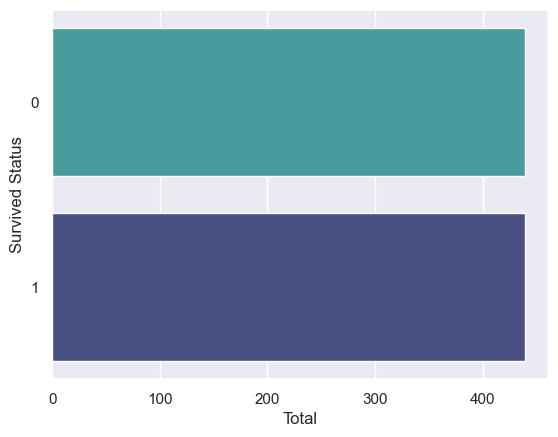

In [25]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=test_X, palette="mako_r")
plt.ylabel('Survived Status')
plt.xlabel('Total')
plt.show()

In [26]:
Logisctic_classifier = LogisticRegression(solver = 'liblinear',max_iter = 100)
Logisctic_classifier.fit(x_train,y_train)

y_pred = Logisctic_classifier.predict(x_test)

print(classification_report(y_test,y_pred),end = '\n')
print('\n')
print(confusion_matrix(y_test,y_pred),end = '\n')
print('\n')
print('logistic regression accuracy: {:.2f}%'.format(accuracy_score(y_pred,y_test)*100),end = '\n')

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.73      0.80      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



[[90 20]
 [14 55]]


logistic regression accuracy: 81.01%


logistic regression accuracy: 81.01%


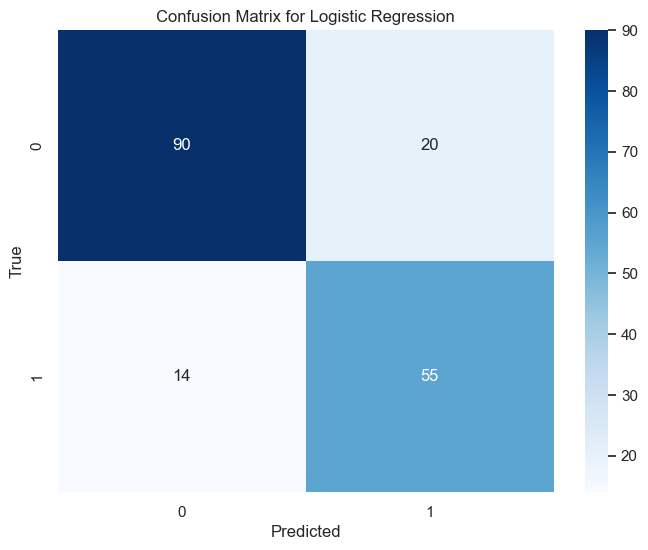

In [28]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
print('logistic regression accuracy: {:.2f}%'.format(accuracy_score(y_pred,y_test)*100),end = '\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Logisctic_classifier.classes_, yticklabels=Logisctic_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()